<a href="https://colab.research.google.com/github/Aras1703/Holt-Winter-s_Forecasting_electrical_energy/blob/main/Time_Series_Forecasting_Electrical_Energy_Forecasting_using_Holt_Winter's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Install & import package**

In [ ]:
pip install git+https://github.com/statsmodels/statsmodels.git

  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-req-build-6kd3_72_
  Running command git clone -q https://github.com/statsmodels/statsmodels.git /tmp/pip-req-build-6kd3_72_
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.14.0.dev0+74.g6d7d42eae-cp37-cp37m-linux_x86_64.whl size=17856557 sha256=6dd3e991fa84f55ccd011a56eef66a37c08c53f888cd185381bc5b19a527a46b
  Stored in directory: /tmp/pip-ephem-wheel-cache-w9tpstsk/wheels/5c/ab/d8/d9505a18dd992621edd24cfddb9a1bd694dee85c065c0a6e57
Successfully built statsmodels
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing
%matplotlib inline

##**Import data**

In [ ]:
df = pd.read_csv('/content/opsd_germany_daily.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [ ]:
df.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


##**Feature selection**

In [ ]:
df.drop(columns='Wind', axis=1, inplace=True)
df.drop(columns='Solar', axis=1, inplace=True)
df.drop(columns='Wind+Solar', axis=1, inplace=True)
df.head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


##**Decomposition check**

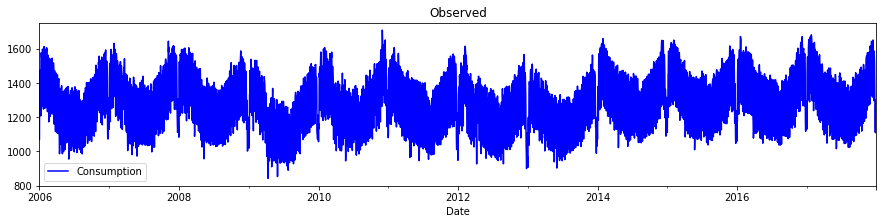

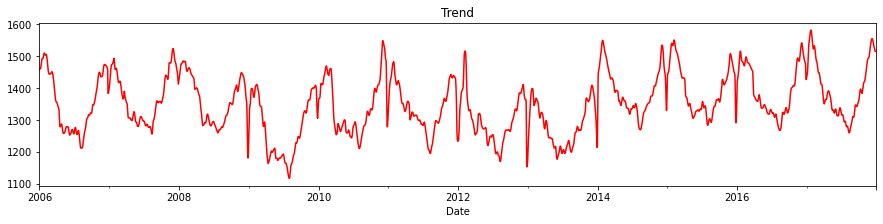

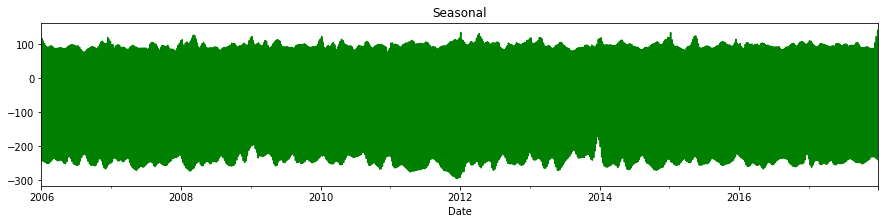

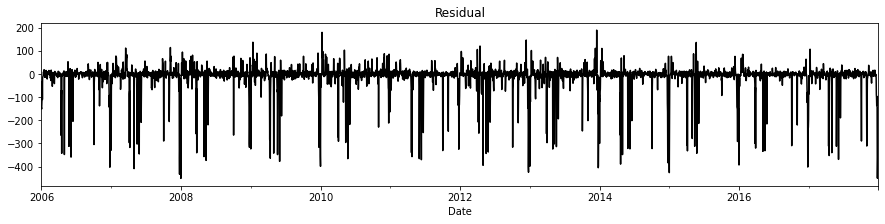

In [ ]:
series = df
components = STL(series, robust=True)
res = components.fit()
res.observed.plot(figsize=(15,3), color='b')
plt.title('Observed')
plt.show()
res.trend.plot(figsize=(15,3), color='r')
plt.title('Trend')
plt.show()
res.seasonal.plot(figsize=(15,3), color='g')
plt.title('Seasonal')
plt.show()
res.resid.plot(figsize=(15,3), color='k')
plt.title('Residual')
plt.show()

##**Resampling data**

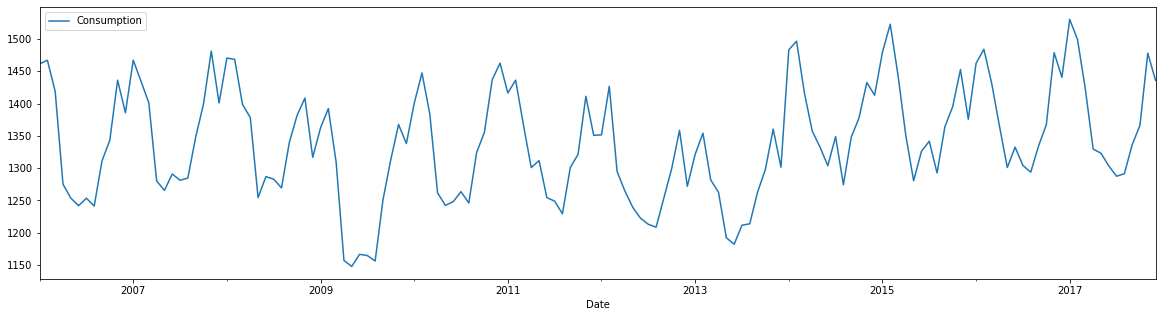

In [ ]:
series = series.resample('M').mean()
series.plot(figsize=(20,5))

##**Dataset splitting**

In [ ]:
X_train, X_test = series[:-20], series[-20:]
len(X_train), len(X_test)

(124, 20)

##**Training model**

In [ ]:
es = ExponentialSmoothing(X_train, seasonal='add', seasonal_periods=12, use_boxcox=True)
model = es.fit(optimized=True)

##**Forecasting**

In [ ]:
pred = model.predict(start=len(X_train)-20, end=len(X_train)+40)

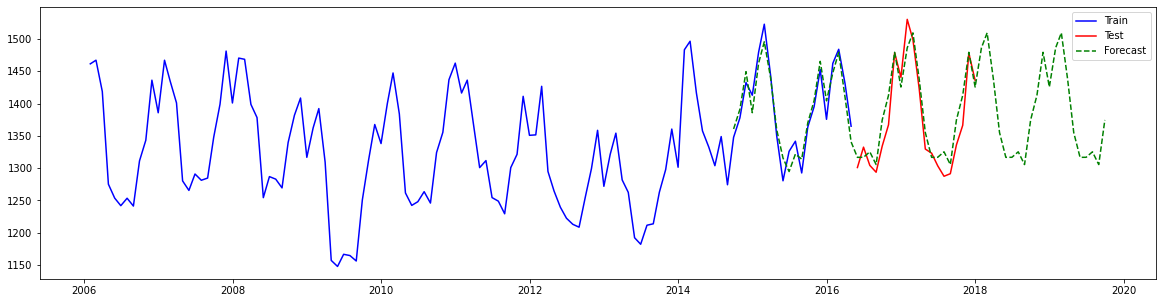

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()